# Data Cleaning

## Purpose 

- Learn to perform data cleaning and preparation for further use in a machine learning task.

### Data Description

The file Mall_Customers.csv is provided, containing the following data on supermarket chain customers:
- CustomerID — Customer identifier.
- Genre – Customer gender.
- Age – Customer age.
- Annual Income (k\$) – Customer’s annual income in thousand dollars.
- Spending Score (1–100) – Customer rating, target variable.

### 1

Let’s load the data from the file Mall_Customers.csv into the notebook and display the first five rows on the screen.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### 2

Let’s conduct an exploratory analysis of the loaded data. Attributes for analysis:
- Number of missing values in each feature.
- Feature distributions.
- Possible outliers or anomalies.



In [5]:
df.isna().sum()

CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

In [6]:
df['Genre'].value_counts() # Feemale это опечатка

Genre
Female     102
Male        77
Feemale      2
Name: count, dtype: int64

In [7]:
df['Genre'] = df['Genre'].replace('Feemale','Female')

In [8]:
df.describe()# возраст 135 лет явно опечатка, удалим эту строку, так же в столбце Annual Income (k$) тоже выброс

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,180.000000,180.000000,200.000000
mean,100.500000,39.894444,5615.433333,50.200000
std,57.879185,16.842848,74531.115872,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,42.000000,34.750000
50%,100.500000,36.000000,61.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,135.000000,1000000.000000,99.000000


In [9]:
df = df[df['Age']<=110]
df = df[df['Annual Income (k$)']<1000000]

Hist Age


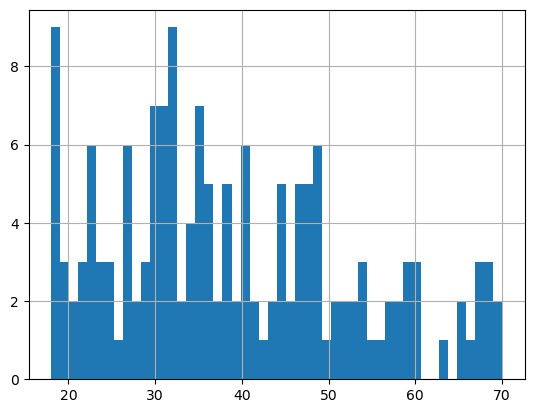

Hist Annual Income (k$)


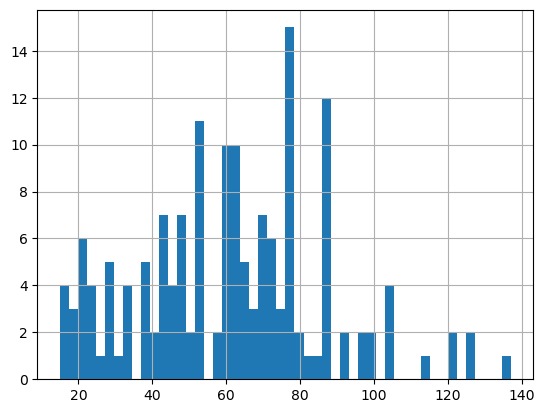

Hist Spending Score (1-100)


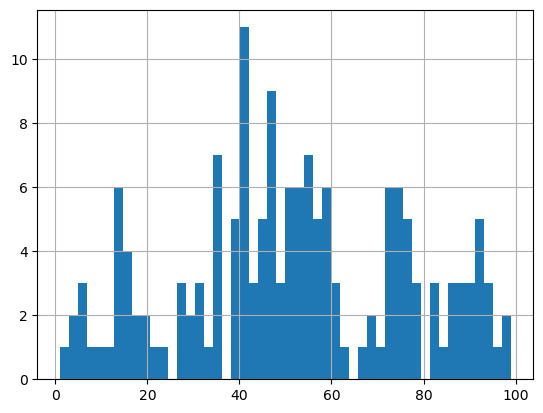

In [10]:
num_cols = ['Age','Annual Income (k$)','Spending Score (1-100)']

for i in num_cols:
    print(f'Hist {i}')
    df[i].hist(bins = 50)
    plt.show()

### 3

Let’s split the data into training and test sets in an 80:20 ratio.

In [11]:
from sklearn.model_selection import train_test_split
x_col = df.drop(columns=['CustomerID','Spending Score (1-100)'], axis = 1).columns
y_col = ['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(df[x_col], df[y_col],test_size=0.2, random_state=1)

### 4
Let’s fill in the missing values in the features of the training set.

In [12]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')

X_train[['Age','Annual Income (k$)']] = imp_mean.fit_transform(X_train[['Age','Annual Income (k$)']])
X_test[['Age','Annual Income (k$)']] = imp_mean.transform(X_test[['Age','Annual Income (k$)']])
imp_mode_y = SimpleImputer(strategy='most_frequent')
y_train[['Spending Score (1-100)']] = imp_mode_y.fit_transform(y_train[['Spending Score (1-100)']])
y_test[['Spending Score (1-100)']] = imp_mode_y.transform(y_test[['Spending Score (1-100)']])

imp_mode_x = SimpleImputer(strategy='most_frequent')
X_train[['Genre']] = imp_mode_x.fit_transform(X_train[['Genre']])
X_test[['Genre']] = imp_mode_x.transform(X_test[['Genre']])

### 5

Let’s identify outliers in the features of the training set.

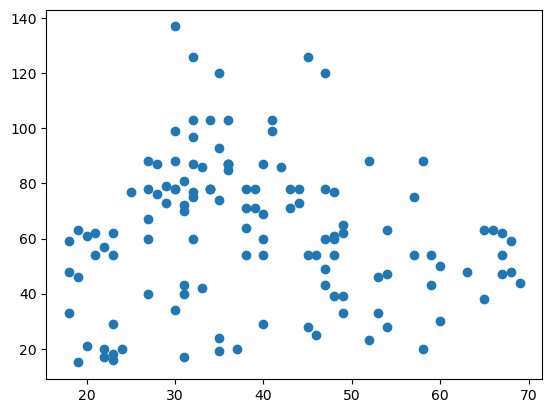

In [13]:
plt.scatter(X_train['Age'],X_train['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15afe4d40>,
 'caps': [<matplotlib.lines.Line2D at 0x15afe52b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a4eee10>],
 'medians': [<matplotlib.lines.Line2D at 0x15afe5850>],
 'fliers': [<matplotlib.lines.Line2D at 0x15afe5b20>],
 'means': []}

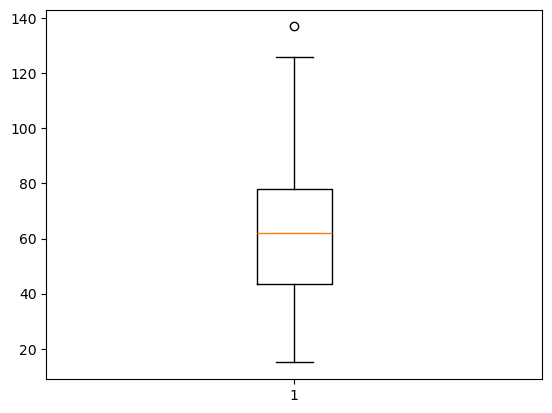

In [14]:
plt.boxplot(X_train['Annual Income (k$)'])

### 6
Normalize the numerical features.


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = ['Age','Annual Income (k$)']
X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])

### 7

Encode the categorical features in the training set.

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
col = ['Genre']
ft = ohe.fit_transform(X_train[col])
df_ft = pd.DataFrame(ft, columns = ohe.get_feature_names_out())
X_tr = X_train.drop('Genre',axis=1).reset_index(drop=True)
X_train_ft = pd.concat([X_tr,df_ft], axis=1)

In [17]:
ft_test = ohe.fit_transform(X_test[col])
df_ft_test = pd.DataFrame(ft_test, columns = ohe.get_feature_names_out())
X_tr_test = X_test.drop('Genre',axis=1).reset_index(drop=True)
X_test_ft = pd.concat([X_tr_test,df_ft_test], axis=1)

In [18]:
X_test_ft

,Age,Annual Income (k$),Genre_Female,Genre_Male
0,-1.144139,-0.926477,0.0,1.0
1,-0.919323,-0.620661,1.0,0.0
2,-0.319816,-1.499881,1.0,0.0
3,-1.518831,0.105651,1.0,0.0
4,-0.994262,-0.009030,0.0,1.0
5,-0.769446,-1.308746,0.0,1.0
6,2.303029,-0.620661,0.0,1.0
7,-0.319816,-1.576335,1.0,0.0
8,0.879199,-0.697115,1.0,0.0
9,-1.219077,0.296786,1.0,0.0
